<a href="https://colab.research.google.com/github/TusharNautiyal-web/CollabNotebooks/blob/main/All%20Notebooks/Clustering_Wine_Quality_using_K_means_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
%matplotlib inline

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Oq0cQuJUSMa-lsP_-C9cFWg0F8CC9X02')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


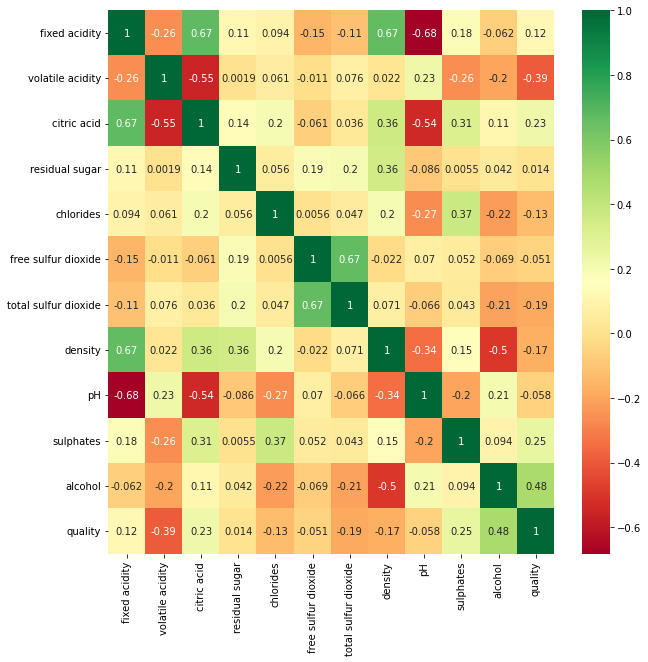

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap = 'RdYlGn', annot = True)

**As there are not that many highly correlated columns we will not drop any columns for now. Above 80 percent correlation should be removed**

In [ ]:
# Removing target column to do Kmeans Clustering.
df.drop('quality', inplace = True, axis = 1)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Text(0, 0.5, 'Sum of squared distances')

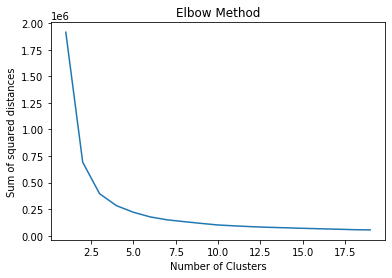

In [ ]:
# Use Elbow method to find out how many clusters should be there.
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances')

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for i in range(2,10):
  kmeans = KMeans(n_clusters = i, max_iter = 100)
  kmeans.fit(df)
  score = silhouette_score(df, kmeans.labels_)
  print(f'For cluster: {i}, The silehoute score is : {score}')

For cluster: 2, The silehoute score is : 0.6034220347331241
For cluster: 3, The silehoute score is : 0.5197446557038226
For cluster: 4, The silehoute score is : 0.48617291416050135
For cluster: 5, The silehoute score is : 0.4466640043369516
For cluster: 6, The silehoute score is : 0.4485800365570335
For cluster: 7, The silehoute score is : 0.39457517078518367
For cluster: 8, The silehoute score is : 0.3915636836455786
For cluster: 9, The silehoute score is : 0.3856215524943123


Text(0, 0.5, 'Silehoute Coffecient')

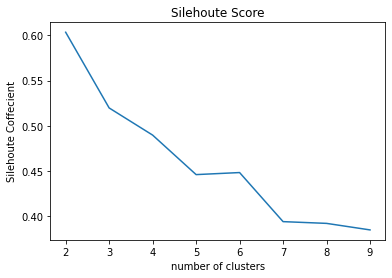

In [ ]:
silhouette_coefficients = []
for i in range(2,10):
  kmeans = KMeans(n_clusters = i, max_iter = 100)
  kmeans.fit(df)
  score = silhouette_score(df, kmeans.labels_)
  silhouette_coefficients.append(score)
plt.plot(range(2,10), silhouette_coefficients)
plt.title('Silehoute Score')
plt.xlabel('number of clusters')
plt.ylabel('Silehoute Coffecient')



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
x = pca.fit_transform(df)

In [ ]:
# We can see 3 is good no to go with now 
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(x) 
unique_labels = np.unique(label)

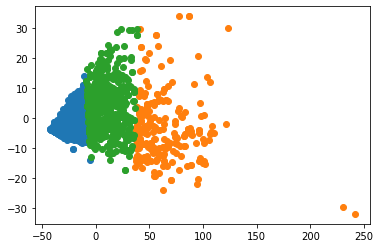

In [ ]:
for i in unique_labels: 
  plt.scatter(x[label == i,0], x[label==i,1], label = i)